In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [284]:
fairness_metric = 'dp'
models = ['clean', 'predicted', 'ours'] 


In [127]:
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")

In [285]:
metrics_titles = {
    "dp" : 'Demographic Parity',
    "eop" : 'Equal Opportunity',
    "eodds" : 'Equalized Odds',
}
metrics_notations = {
    "dp" : '$\Delta_{DP}$',
    "eop" : '$\Delta_{EOP}$',
    "eodds" : '$\Delta_{EOD}$',
}

In [286]:
dataset = 'adult' 
#dataset = 'compas' 
#dataset = 'new_adult' 
#dataset = 'acs_employment' 

In [491]:
def plot_result(base_model="rf", dataset=dataset, show_legend=False):    
    if base_model == "avd_debaising":
        fair_metrics = ["dp", "eodds"]
    else:
        fair_metrics = ["dp", "eop", "eodds"]
    
    base_dir = './results/{}/pareto/'.format(dataset)
    base_dir_all = './results/{}/averaged/'.format(dataset)
    out_plots_dir = './results/plots/'

    fig_size = (6, 2.5) if len(fair_metrics) <= 2 else (9.8, 2.5) 
    fig, axes = plt.subplots(1, len(fair_metrics), figsize=(fig_size[0],fig_size[1])) 
    
    for i, fair_metric in enumerate(fair_metrics): 
        clean_sensitive_file = "{}{}_model_{}_clean.csv".format(base_dir, base_model, fair_metric)
        predicted_sensitive_dnn_file = "{}{}_model_{}_predicted_DNN.csv".format(base_dir, base_model, fair_metric)
        predicted_sensitive_knn_file = "{}{}_model_{}_predicted_KNN.csv".format(base_dir, base_model, fair_metric)
        predicted_sensitive_filtered = "{}{}_model_{}_ours{}.csv".format(base_dir, base_model, fair_metric, '' if dataset in ['compas_race'] else '_DNN')
        predicted_sensitive_weighted = "{}{}_model_{}_ours_w_DNN.csv".format(base_dir, base_model, fair_metric)
        
        unfair_file = "{}unfair_{}_model.csv".format(base_dir_all, base_model, fair_metric) 
         
        df_clean = pd.read_csv(clean_sensitive_file).sort_values("unfairness") 
        df_predicted_dnn = pd.read_csv(predicted_sensitive_dnn_file).sort_values("unfairness") 
        df_predicted_knn = pd.read_csv(predicted_sensitive_knn_file).sort_values("unfairness")
        df_filtered = pd.read_csv(predicted_sensitive_filtered).sort_values("unfairness")

        df_unfair = pd.read_csv(unfair_file)
        df_unfair = df_unfair.iloc[0]
        #df_predicted_dnn_all = pd.read_csv(predicted_sensitive_dnn_file_all)#.sort_values("epsilon")
        #df_predicted_knn_all = pd.read_csv(predicted_sensitive_knn_file_all)#.sort_values("epsilon")
        #print(df_unfair)
        if len(fair_metrics) > 1:
            ax = axes[i]
        else:
            ax = axes
        #t = Nsteps, Nwalkers = 100, 250

        
        t = np.arange(100)
        
        ax.plot(df_clean.unfairness, df_clean.accuracy,'-dg', label='Ground truth' if i == 0 else None)
        ax.plot(df_predicted_dnn.unfairness, df_predicted_dnn.accuracy, '-*c', label='Proxy-DNN' if i == 0 else None)
        ax.plot(df_predicted_knn.unfairness, df_predicted_knn.accuracy, '-xm', label='Proxy-KNN' if i == 0 else None)
        ax.plot(df_filtered.unfairness, df_filtered.accuracy, '-or', label='OURS' if i == 0 else None) 
        
        ax.axvline(x = df_unfair[fair_metric], color = 'b', label = 'Unfair' if i == 0 else None)
        ax.axhline(y = df_unfair.acc, color = 'b')
        ax.scatter(x=df_unfair[fair_metric], y=df_unfair.acc, marker='*')
        alpha = .18
        ax.fill_between(df_clean.unfairness, df_clean.accuracy-df_clean.std_acc, df_clean.accuracy+df_clean.std_acc,facecolor='g', alpha=alpha)
        ax.fill_between(df_predicted_knn.unfairness, df_predicted_knn.accuracy-df_predicted_knn.std_acc, df_predicted_knn.accuracy+df_predicted_knn.std_acc,facecolor='m', alpha=alpha)
        ax.fill_between(df_predicted_dnn.unfairness, df_predicted_dnn.accuracy-df_predicted_dnn.std_acc, df_predicted_dnn.accuracy+df_predicted_dnn.std_acc,facecolor='c', alpha=alpha)
        ax.fill_between(df_filtered.unfairness, df_filtered.accuracy-df_filtered.std_acc, df_filtered.accuracy+df_filtered.std_acc,facecolor='r', alpha=alpha)
        
        #if dataset in ["adult", "compas_race"]:
        #    df_weighted = pd.read_csv(predicted_sensitive_weighted)#.sort_values("unfairness")
        #    ax.plot(df_weighted.unfairness, df_weighted.accuracy, ':xy', label='Weighted (OURS)' if i == 0 else None)
        #    ax.fill_between(df_weighted.unfairness, df_weighted.accuracy-df_weighted.std_acc, df_weighted.accuracy+df_weighted.std_acc,facecolor='y', alpha=alpha)
        
        ax.set_ylabel('Accuracy')
        ax.set_xlabel(metrics_notations[fair_metric])

        #ax.set_title(metrics_titles[fair_metric]) 
 
    legend_x_pos = 1.1 if len(fair_metrics) <= 2 else .87
    if show_legend:
        #fig.legend(bbox_to_anchor=(legend_x_pos,.63))
        fig.legend(bbox_to_anchor=(legend_x_pos,1.1), ncol=5,borderaxespad=0.5)
        #fig.legend(loc="upper center", ncol=5)
    #fig.legend()
    fig.tight_layout() 
    #plt.title("Title")
    #plt.xlabel('Unfairness')
    #plt.ylabel("Accuracy")
    #plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.savefig('{}{}_{}.pdf'.format(out_plots_dir, dataset, base_model), bbox_inches='tight')
    plt.show()

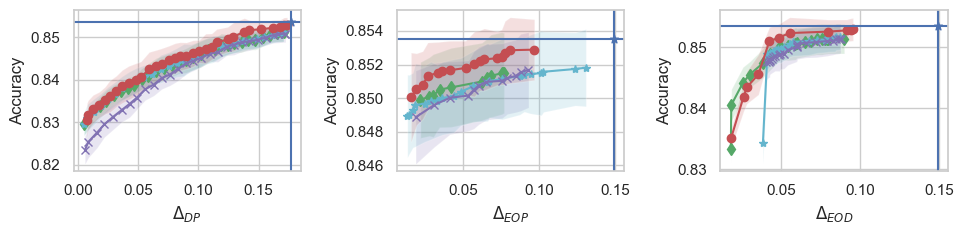

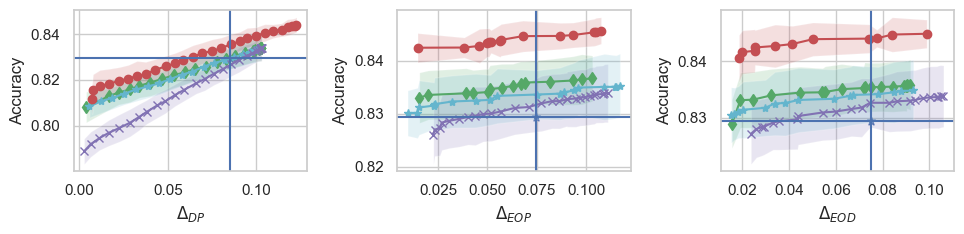

In [499]:
plot_result(base_model="lr", dataset="adult",show_legend=False) 
plot_result(base_model="rf", dataset="adult")  

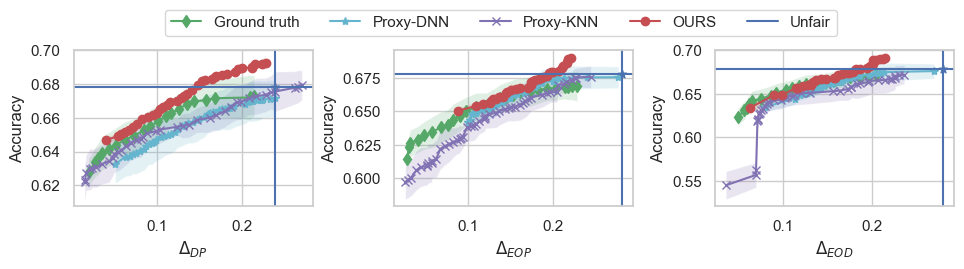

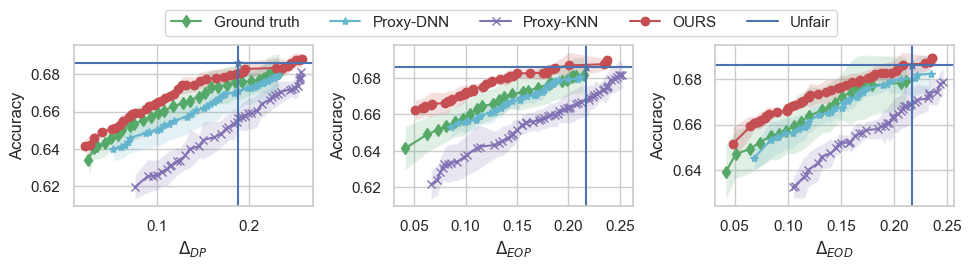

In [498]:
plot_result(base_model="lr", dataset="compas_race", show_legend=True) 
plot_result(base_model="rf", dataset="compas_race", show_legend=True) 

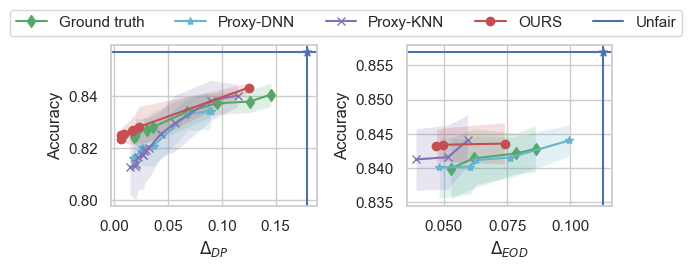

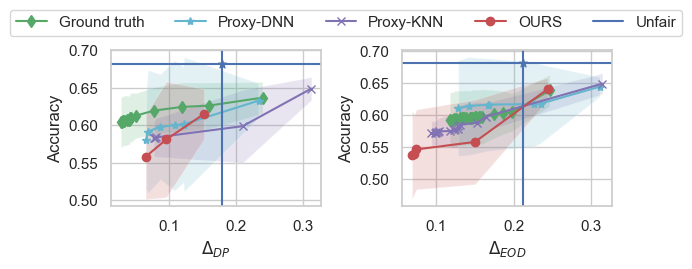

In [493]:
plot_result(base_model="avd_debaising", dataset="adult", show_legend=True)
plot_result(base_model="avd_debaising", dataset="compas_race", show_legend=True)

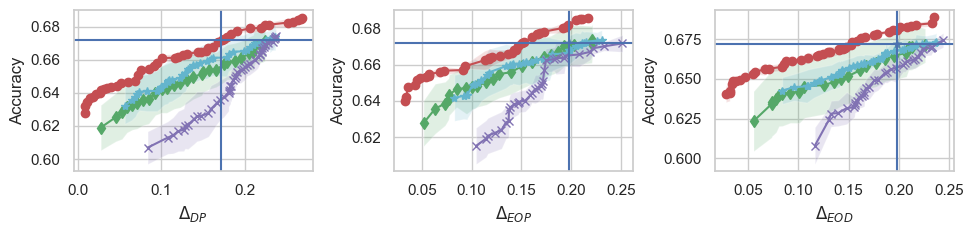

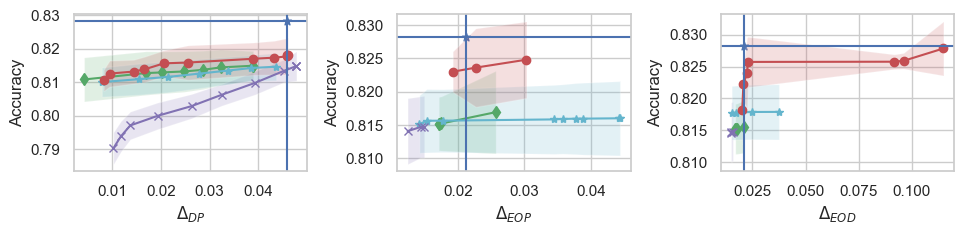

In [505]:
plot_result(base_model="gbm", dataset="compas_race")
plot_result(base_model="gbm", dataset="adult")

In [51]:
uncertainty_thresolds = np.arange(0.1, 1.1,.1)
uncertainty_thresolds

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [529]:
def plot_result_ablation(base_model="rf", dataset="adult", save_file=False, show_legend=False):    
    if base_model == "avd_debaising":
        fair_metrics = ["dp", "eodds"]
    else:
        fair_metrics = ["dp", "eop", "eodds"]
    
    base_dir = './results/{}/ablation/'.format(dataset)
    base_dir_all = './results/{}/averaged/'.format(dataset)
    out_plots_dir = './results/plots/ablation/'.format(dataset)  

    fig_size = (6, 2.7) if len(fair_metrics) <= 2 else (10, 2.5) 
    fig, axes = plt.subplots(1, len(fair_metrics), figsize=(fig_size[0],fig_size[1]))  

    #uncertainty_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0]
    #uncertainty_thresholds = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7]
    uncertainty_thresholds = [0.1, 0.3, 0.5, 0.6, 0.7]
    colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#17becf', '#2ca02c', '#bcbd22']
    alpha = .18
    base_dir_clean = './results/{}/pareto/'.format(dataset)
    for i, fair_metric in enumerate(fair_metrics): 
        clean_sensitive_file = "{}{}_model_{}_clean.csv".format(base_dir_clean, base_model, fair_metric)
        predicted_sensitive_dnn_file = "{}{}_model_{}_predicted_DNN.csv".format(base_dir_clean, base_model, fair_metric)
        predicted_sensitive_filtered = "{}{}_model_{}_ours{}.csv".format(base_dir_clean, base_model, fair_metric, '' if dataset in ['compas_race'] else '_DNN')
        
        df_clean = pd.read_csv(clean_sensitive_file).sort_values("unfairness") 
        df_predicted = pd.read_csv(predicted_sensitive_dnn_file).sort_values("unfairness") 
        df_filtered_ = pd.read_csv(predicted_sensitive_filtered).sort_values("unfairness") 
        axes[i].plot(df_clean.unfairness, df_clean.accuracy,'-.og', label='Clean' if i == 0 else None)
        axes[i].plot(df_predicted.unfairness, df_predicted.accuracy,'-o', color="#bcbd22", label='Proxy-DNN' if i == 0 else None)
        #axes[i].plot(df_filtered_.unfairness, df_filtered_.accuracy,'-o', color="red", label='OURS' if i == 0 else None)
        for (tr, color) in zip(uncertainty_thresholds,colors):
            folder_dir = "{}ours_{}/".format(base_dir, tr) 
            predicted_sensitive_filtered = "{}{}_model_{}_ours.csv".format(folder_dir, base_model, fair_metric)
            
            unfair_file = "{}unfair_{}_model.csv".format(base_dir_all, base_model, fair_metric) 
             
            df_filtered = pd.read_csv(predicted_sensitive_filtered).sort_values("unfairness")

            df_unfair = pd.read_csv(unfair_file)
            df_unfair = df_unfair.iloc[0]
            #df_predicted_dnn_all = pd.read_csv(predicted_sensitive_dnn_file_all)#.sort_values("epsilon")
            #df_predicted_knn_all = pd.read_csv(predicted_sensitive_knn_file_all)#.sort_values("epsilon")
            #print(df_unfair)
            if len(fair_metrics) > 1:
                ax = axes[i]
            else:
                ax = axes
            #t = Nsteps, Nwalkers = 100, 250

            
            t = np.arange(100)
            
            ax.plot(df_filtered.unfairness, df_filtered.accuracy, '-.*',  color=color, label='H={}'.format(tr) if i == 0 else None)
            
            ax.fill_between(df_filtered.unfairness, df_filtered.accuracy-df_filtered.std_acc, df_filtered.accuracy+df_filtered.std_acc,facecolor=color, alpha=alpha)
            ax.set_ylabel('Accuracy')
            ax.set_xlabel(metrics_notations[fair_metric])

            ax.set_title(metrics_titles[fair_metric]) 
        #ax.axvline(x = df_unfair[fair_metric], color = color, label = 'Unfair' if i == 0 else None)
        #ax.axhline(y = df_unfair.acc, color = color)
        #ax.scatter(x=df_unfair[fair_metric], y=df_unfair.acc, marker='*')
    legend_x_pos = 0.50 if len(fair_metrics) <= 2 else 0.33
    if show_legend:
        fig.legend(bbox_to_anchor=(.9,1.1), ncol=len(uncertainty_thresholds)+2)
    fig.tight_layout() 
    #plt.title("Title")
    #plt.xlabel('Unfairness')
    #plt.ylabel("Accuracy")
    #plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    #plt.savefig('{}{}.pdf'.format(out_plots_dir, base_model))
    if save_file:
        plt.savefig('{}ablation_{}_{}.pdf'.format(out_plots_dir, dataset, base_model), bbox_inches='tight')
    plt.show()

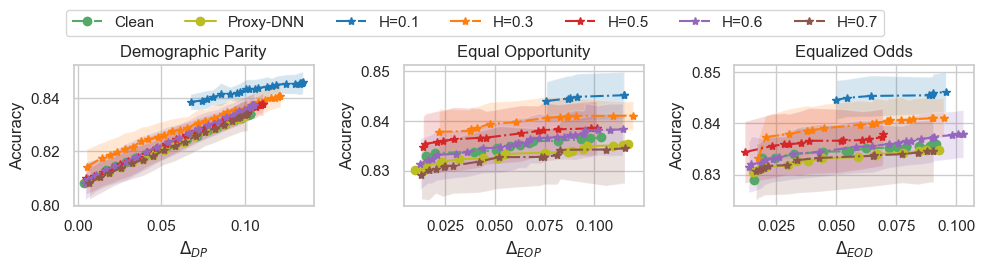

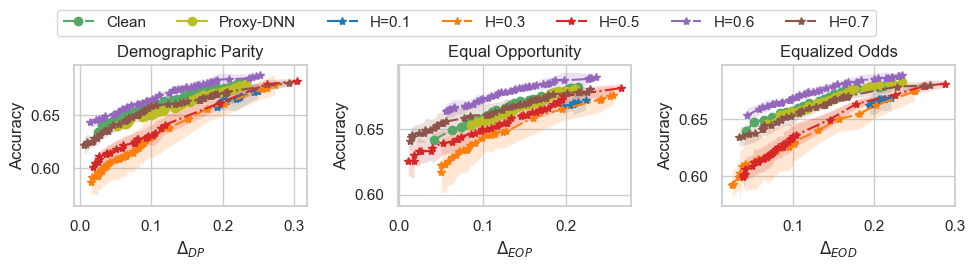

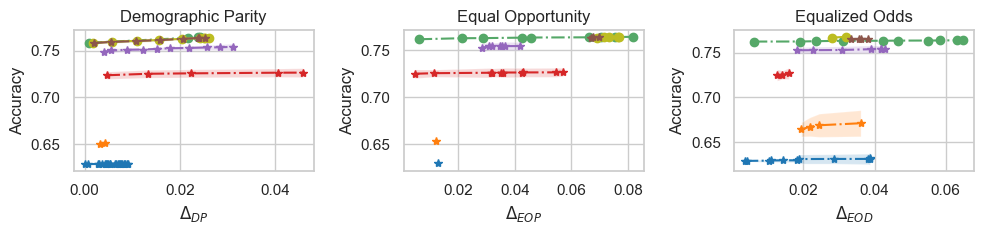

In [530]:
plot_result_ablation(base_model="rf", dataset='adult', save_file=True, show_legend=True)
plot_result_ablation(base_model="rf", dataset='compas_race', save_file=True, show_legend=True)
plot_result_ablation(base_model="rf", dataset='new_adult', save_file=True)